## Ground Truth Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet34_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Files already downloaded and verified
Before temperature - NLL: 0.335, ECE: 0.047
Optimal temperature: 4.904
After temperature - NLL: 0.883, ECE: 0.464


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8694 ± 0.0035
Final Average Prediction Set Size: 0.97 ± 0.01
Final Average Coverage: 0.8946 ± 0.0038
Final Average Real Probability: 0.8665 ± 0.0038


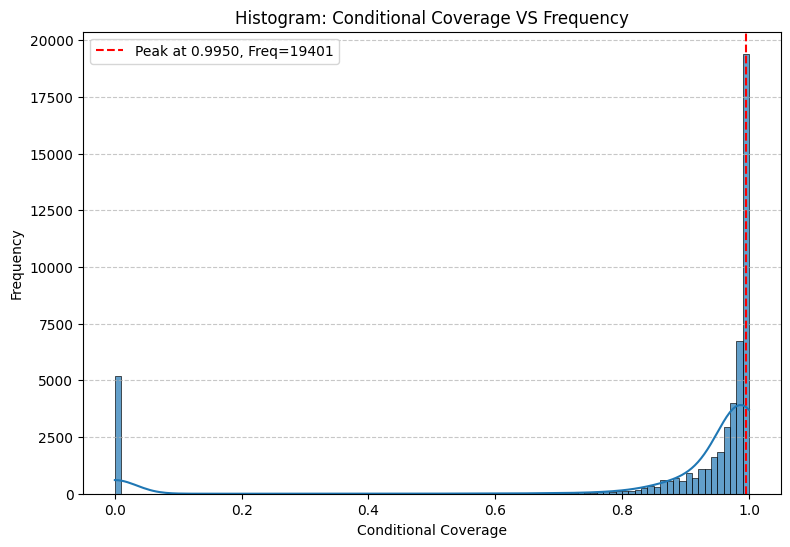

19401 (38.80%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8697 ± 0.0034
Final Average Prediction Set Size: 0.96 ± 0.01
Final Average Coverage: 0.8946 ± 0.0039
Final Average Real Probability: 0.8656 ± 0.0039


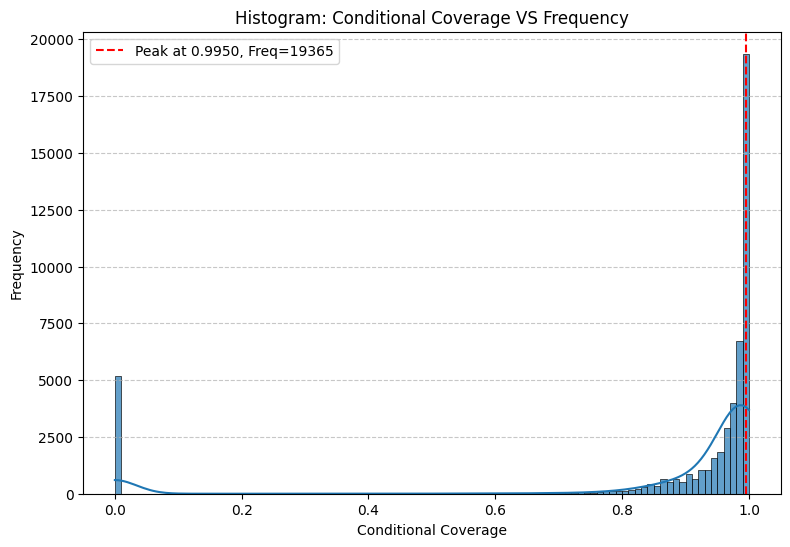

19365 (38.73%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.01, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8751 ± 0.0044
Final Average Prediction Set Size: 0.91 ± 0.00
Final Average Coverage: 0.8977 ± 0.0044
Final Average Real Probability: 0.8620 ± 0.0044


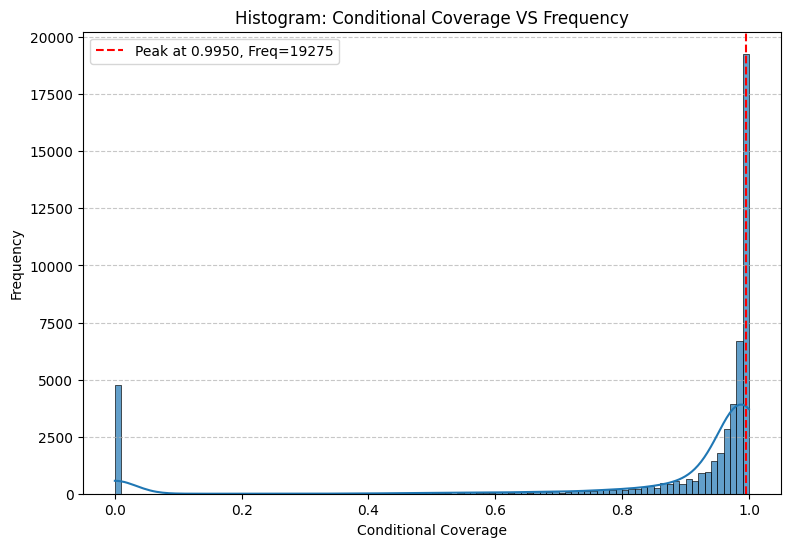

19275 (38.55%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.5, num_runs=10, alpha=0.1)

## Model Test

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4747 ± 0.0029
Final Average Prediction Set Size: 1.26 ± 0.01
Final Average Coverage: 0.8943 ± 0.0058
Final Average Real Probability: 0.8658 ± 0.0060


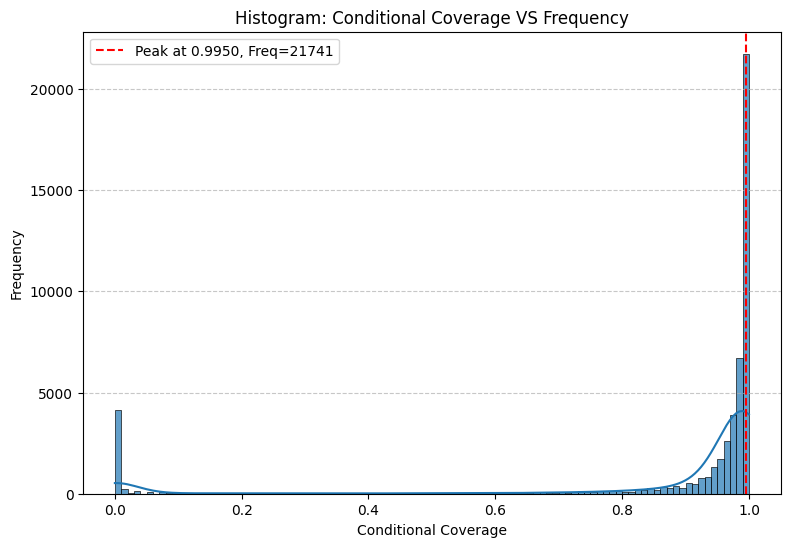

21741 (43.48%) samples reached the peak conditional coverage at 0.9950


In [4]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4747 ± 0.0029
Final Average Prediction Set Size: 1.26 ± 0.01
Final Average Coverage: 0.8943 ± 0.0058
Final Average Real Probability: 0.8658 ± 0.0060


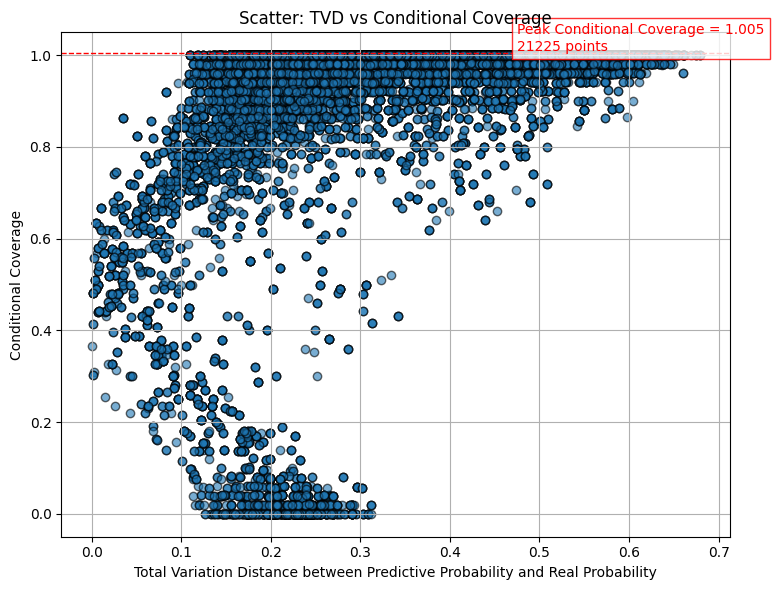

Peak Conditional Coverage = 1.005, with 21225 samples

=== Count Regions Summary ===
39985 (80.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1780 (3.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
3385 (6.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.75490']
  Real Probability Set      : ['0.92000']
Sample 2:
  Predictive Probability Set: ['0.65336']
  Real Probability Set      : ['0.84314']
Sample 3:
  Predictive Probability Set: ['0.65336']
  Real Probability Set      : ['0.84314']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.30661', '0.18737']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.18352', '0.13927', '0.10832']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.27525', '0.23554']
  Real Pro

In [3]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4838 ± 0.0034
Final Average Prediction Set Size: 1.12 ± 0.01
Final Average Coverage: 0.8953 ± 0.0075
Final Average Real Probability: 0.8655 ± 0.0080


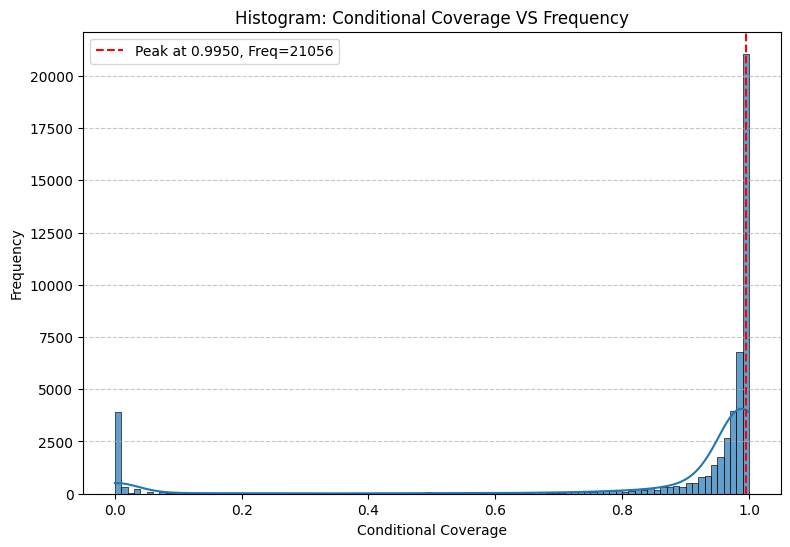

21056 (42.11%) samples reached the peak conditional coverage at 0.9950


In [11]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.01, k_reg=1, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4838 ± 0.0034
Final Average Prediction Set Size: 1.12 ± 0.01
Final Average Coverage: 0.8953 ± 0.0075
Final Average Real Probability: 0.8655 ± 0.0080


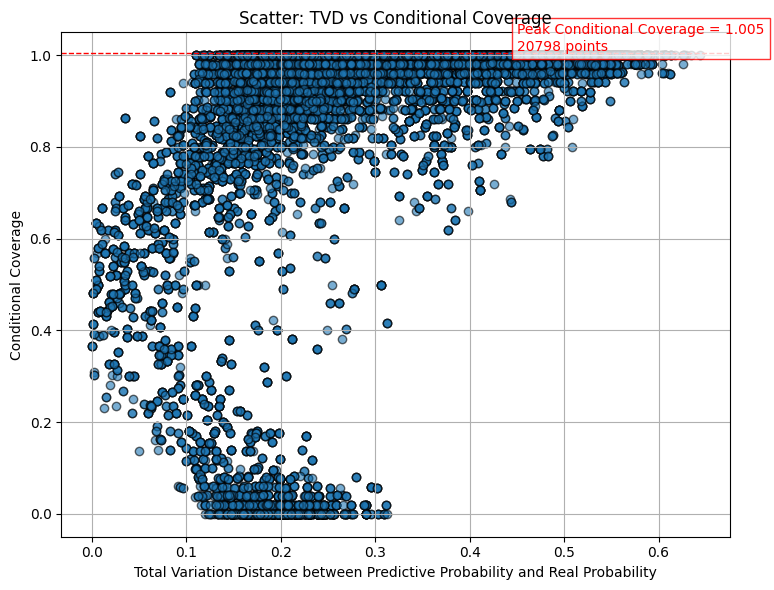

Peak Conditional Coverage = 1.005, with 20798 samples

=== Count Regions Summary ===
41222 (82.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1031 (2.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
3965 (7.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64254']
  Real Probability Set      : ['0.82692']
Sample 2:
  Predictive Probability Set: ['0.67108']
  Real Probability Set      : ['0.86792']
Sample 3:
  Predictive Probability Set: ['0.64069']
  Real Probability Set      : ['0.82353']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64058']
  Real Probability Set      : ['0.08000']
Sample 2:
  Predictive Probability Set: ['0.60044']
  Real Probability Set      : ['0.02000']
Sample 3:
  Predictive Probability Set: ['0.55391']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage --

In [10]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.01, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5129 ± 0.0035
Final Average Prediction Set Size: 0.98 ± 0.01
Final Average Coverage: 0.8992 ± 0.0063
Final Average Real Probability: 0.8675 ± 0.0065


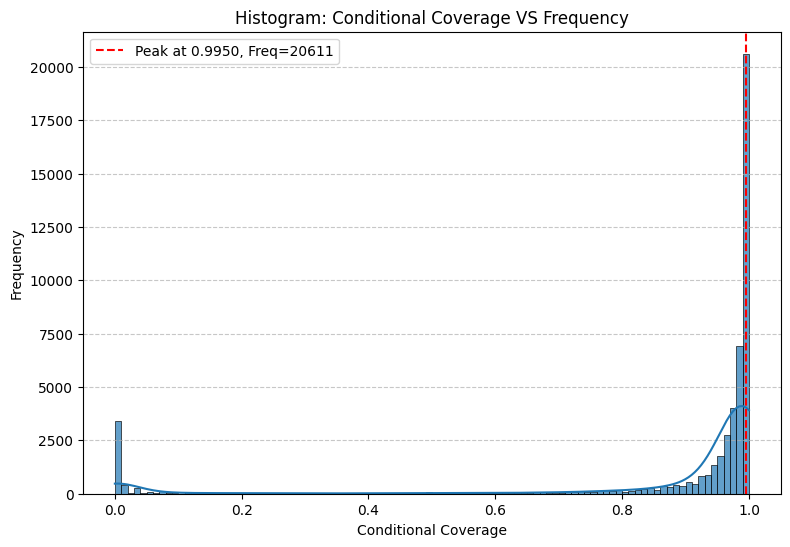

20611 (41.22%) samples reached the peak conditional coverage at 0.9950


In [3]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.5, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5194 ± 0.0048
Final Average Prediction Set Size: 0.99 ± 0.01
Final Average Coverage: 0.9013 ± 0.0064
Final Average Real Probability: 0.8698 ± 0.0065


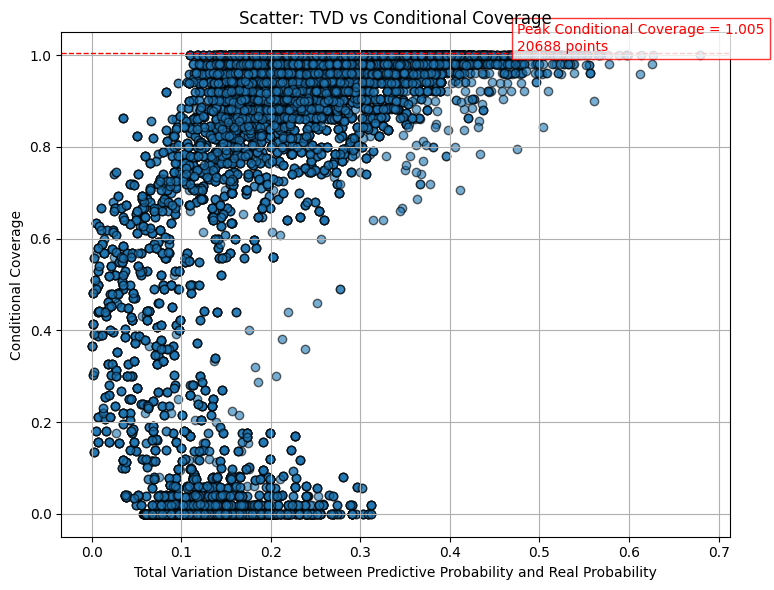

Peak Conditional Coverage = 1.005, with 20688 samples

=== Count Regions Summary ===
42818 (85.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
89 (0.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
5515 (11.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.65186']
  Real Probability Set      : ['0.84000']
Sample 2:
  Predictive Probability Set: ['0.66975']
  Real Probability Set      : ['0.83673']
Sample 3:
  Predictive Probability Set: ['0.65336']
  Real Probability Set      : ['0.84314']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.49555']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.51019']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.51385']
  Real Probability Set      : ['0.05882']

--- Region 3: medium TVD, medium Coverage ---

In [12]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.5, num_runs=10, alpha=0.1)